Create a target function 𝑓 and a bidimensional dataset 𝐷 and see how the perceptron learning algorithm works. Choose a random line in the plane as your target function, where one side of the line maps to +1 and the other maps to -1. Choose the inputs  𝑥_𝑛 of the data set as random points in the plane and evaluate the target function on each  𝑥_𝑛 to get the corresponding output  𝑦_𝑛.

a) Create a dataset of size 100. Run the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis 𝑔 matches your target 𝑓.
​

b) Plot the examples (𝑥_𝑛, 𝑦_𝑛) as well as the target function 𝑓 on a plane. Be sure to mark the examples from different classes differently.
​​

c) Report the number of updates that the algorithm takes before converging.
​

d) Repeat everything in (a) with another randomly generated data set of size 1000.  Compare the results with (a).
​

e) Modify the algorithm such that it takes 𝑥_𝑛 ∈ ℝ^10.  Randomly generate a linearly separable data set of size 1000 with 𝑥_𝑛 ∈ ℝ^10 and feed the data set to the algorithm.  How many updates does the algorithm take to converge?

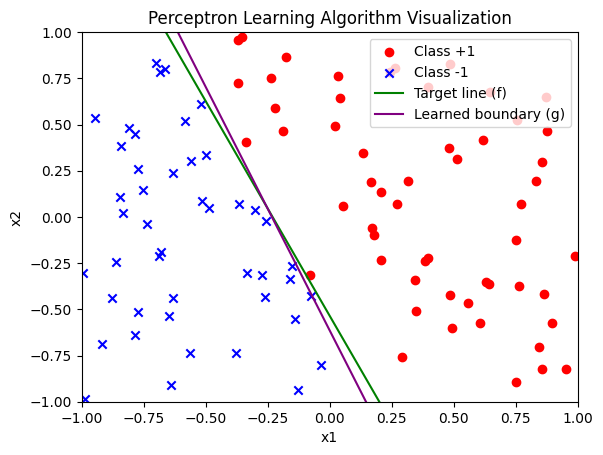

PLA converged after 31 iterations.


In [ ]:
"""
Perceptron Learning Algorithm with Random Line as Target Function
"""
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
import numpy as np
import matplotlib.pyplot as plt
# Question a: Part 1 - Create a dataset of size 100
def generate_random_line():
    """
    Here, we generate a random line in 2D space for use as a target function.
    It then returns coefficients (slope, intercept) of the line.
    This function is part of question a, creating the basis for the target function.
    """
    # Generate two random points within the range [-1, 1] for both x and y.
    points = np.random.uniform(-1, 1, (2, 2))
    # Compute the slope of the line using the y-differences over the x-differences between the points.
    # This determines the angle of our line.
    slope = (points[1, 1] - points[0, 1]) / (points[1, 0] - points[0, 0])
    # Compute the intercept of the line by using the equation of a line (y = mx + b)
    intercept = points[0, 1] - slope * points[0, 0]
    return slope, intercept

def label_point(x, slope, intercept):
    """
    Label a point based on its position relative to a line (target function).
    We do this labeling as part of question a for generating the dataset.
    """
    # Here we determine if the points lie above or below the line.
    return 1 if x[1] > slope * x[0] + intercept else -1

def generate_data(N, slope, intercept):
    """
    Here we are generating a dataset of N 2D points with labels based on a line.
    This function is also part of question a since it is creating the dataset.
    """
    # Randomly generate N points in a 2D space.
    X = np.random.uniform(-1, 1, (N, 2))
    # Label each point based on its position
    y = np.array([label_point(x, slope, intercept) for x in X])
    X = np.c_[np.ones(N), X]  # Add x0 = 1 for bias term
    return X, y
# Question a: Part 2 - Run the perceptron learning algorithm and see how it converges
def perceptron_learning_algorithm(X, y):
    """
    Here we apply the Perceptron Learning Algorithm to the dataset.
    This function is part of question a and it is used for running the PLA and checking for convergence.
    """
    w = np.zeros(3)  # Initialize weights
    iterations = 0
    while True:
        # Identify misclassified points
        misclassified = [(x, label) for x, label in zip(X, y) if np.sign(w.dot(x)) != label]
        if not misclassified:
            break
        # Randomly select one misclassified point and update weights
        x_mis, label_mis = misclassified[np.random.randint(len(misclassified))]
        w += label_mis * x_mis # Adjust weights to correct misclassification
        iterations += 1
    return w, iterations

# Question b: Plot the examples and the target function
def plot_data_and_line(X, y, slope, intercept, w):
    """
    Here we plot the data points, the target line, and the learned decision boundary.
    This function is part of question b since it visualizes the dataset and the target function.
    """
    plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], c='r', marker='o', label='Class +1')
    plt.scatter(X[:, 1][y == -1], X[:, 2][y == -1], c='b', marker='x', label='Class -1')
    plt.axline((0, intercept), slope=slope, color='green', label='Target line (f)')
    # Plotting the decision boundary learned by the perceptron
    if w[2] != 0:
        decision_boundary = lambda x: (-w[0] - w[1] * x) / w[2]
        plt.plot([-1, 1], [decision_boundary(-1), decision_boundary(1)], color='purple', label='Learned boundary (g)')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title("Perceptron Learning Algorithm Visualization")
    plt.show()

# Main Script
# Question a: Creating and processing the dataset
N = 100 # Dataset size for question a
slope, intercept = generate_random_line() # Generate a random line as target functio
X, y = generate_data(N, slope, intercept) # Generate dataset
w, iterations = perceptron_learning_algorithm(X, y) # Run PLA

# Question b: Visualizing the dataset and target function
plot_data_and_line(X, y, slope, intercept, w)

# Question c: Reporting the number of iterations for PLA convergence
print(f"PLA converged after {iterations} iterations.")


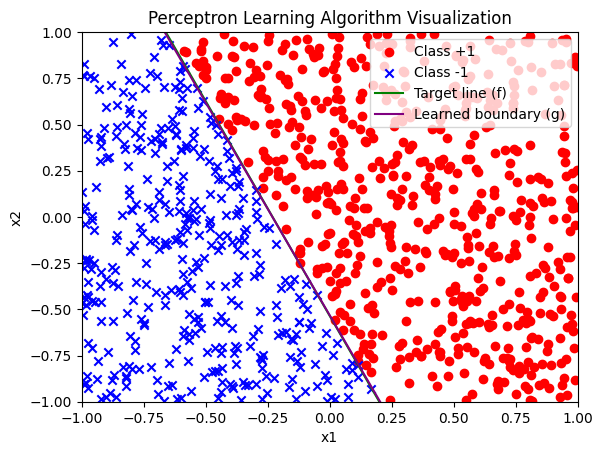

PLA with 1000 data points converged after 259 iterations.
VS
PLA with 100 data points converged after 31 iterations.


In [ ]:
# Experiment with dataset size 1000. Question D.
N = 1000
# Generating a new dataset of 1000 points using the same target function
X, y = generate_data(N, slope, intercept)
# Running the Perceptron Learning Algorithm on the larger dataset
w, iterations_1000 = perceptron_learning_algorithm(X, y)
plot_data_and_line(X, y, slope, intercept, w)
print(f"PLA with 1000 data points converged after {iterations_1000} iterations.")
print("VS")
print(f"PLA with 100 data points converged after {iterations} iterations.")

In [ ]:
def generate_high_dimensional_data(N, dimension, w_true):
    """
    Generate dataset of N points in 'dimension' dimensional space with labels based on a linearly separable function.
    here we are handling high-dimensional data.
    """
    X = np.random.uniform(-1, 1, (N, dimension))
    y = np.array([1 if np.dot(w_true, np.insert(x, 0, 1)) > 0 else -1 for x in X])
    X = np.c_[np.ones(N), X]  # Add x0 = 1 for bias term
    return X, y

def perceptron_learning_algorithm_high_dim(X, y):
    """
    Apply the Perceptron Learning Algorithm to the high-dimensional dataset.
    Here we modify the first verions of PLA for handling high-dimensional data(10 in this case).
    """
    w = np.zeros(X.shape[1]) # Initializing weights for high-dimensional data
    iterations = 0
    while True:
        misclassified = [(x, label) for x, label in zip(X, y) if np.sign(np.dot(w, x)) != label]
        if not misclassified:
            break
        x_mis, label_mis = misclassified[np.random.randint(len(misclassified))]
        w += label_mis * x_mis # Updating weights based on misclassified points
        iterations += 1
    return w, iterations

# Generate a linearly separable dataset in 10-dimensional space
N = 1000
dimension = 10 # Number of dimensions
w_true = np.random.uniform(-1, 1, dimension + 1)  # Randomly generate true weights for a linearly separable function
X_high_dim, y_high_dim = generate_high_dimensional_data(N, dimension, w_true) # Generating the dataset

# Run the modified perceptron algorithm
# applying the PLA to high-dimensional data
w_learned, iterations_high_dim = perceptron_learning_algorithm_high_dim(X_high_dim, y_high_dim)
print(f"PLA: {iterations_high_dim}")

PLA: 2240
